<a href="https://colab.research.google.com/github/Suvanga/-Stable-Roomate/blob/main/Neural_Network_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neurral Network Classification with Pytorch
* Neural network is usewd to predict whether there somethinf is one thing or the other there can be multiple things as resource
* https://www.learnpytorch.io/02_pytorch_classification/

### 1. Make some data and get it Ready
* here we will take a custmom data set from sklearn

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

#Making a 1000 samples

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state= 42)



In [ ]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y :\n{y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y :
[1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


#VISUALIZE
#VISUALIZE
#VISUALIZE

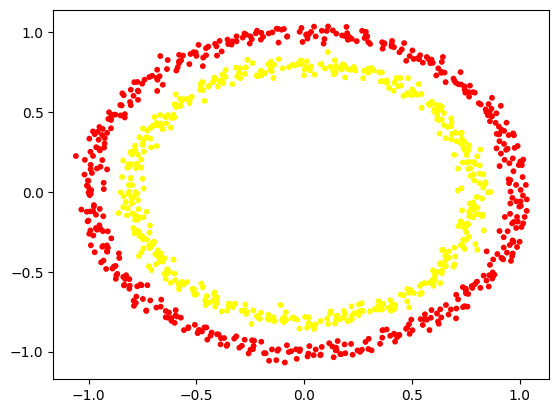

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            s=10,
            cmap='autumn')


##Making data features and labels visualization

In [ ]:
#note we have created a toy data set, toy here refers to small fundamental data set, ourtprediction is like

X.shape, y.shape

print(f" X sample is  {X[0]} and the y value is {y[0]}")
print(f" X shape is  {(X[0]).shape} and the y value is {(y[0]).shape}")


 X sample is  [0.75424625 0.23148074] and the y value is 1
 X shape is  (2,) and the y value is ()


## 1.2 Creating a train and test Splits
1. CHanginf the dataset from numpy to float 32 which is in pytorch default dtype is float32, so we will be changing it into that

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('int64'))

In [ ]:
import torch
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.int64)
split_data = 80


In [ ]:
from sklearn.model_selection import train_test_split # Imported to split it

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)



In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

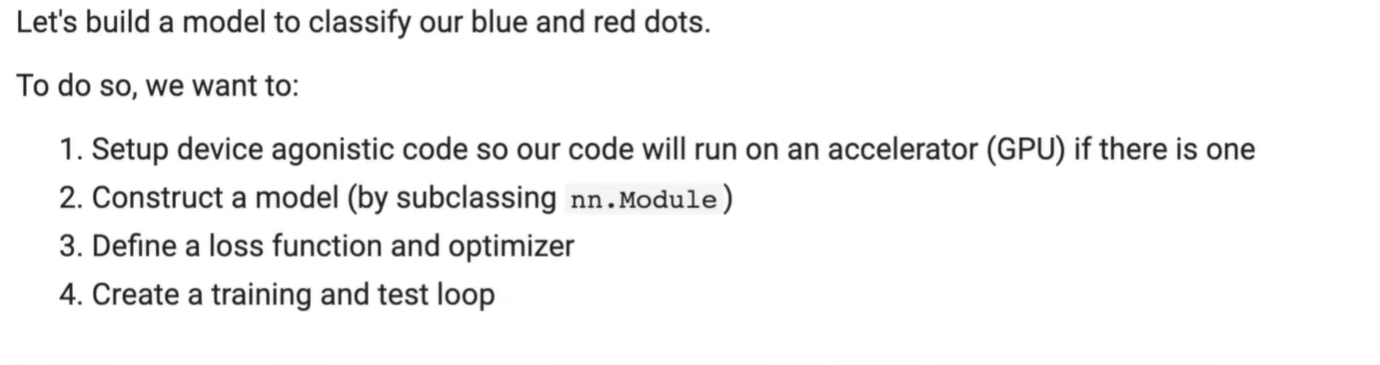

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

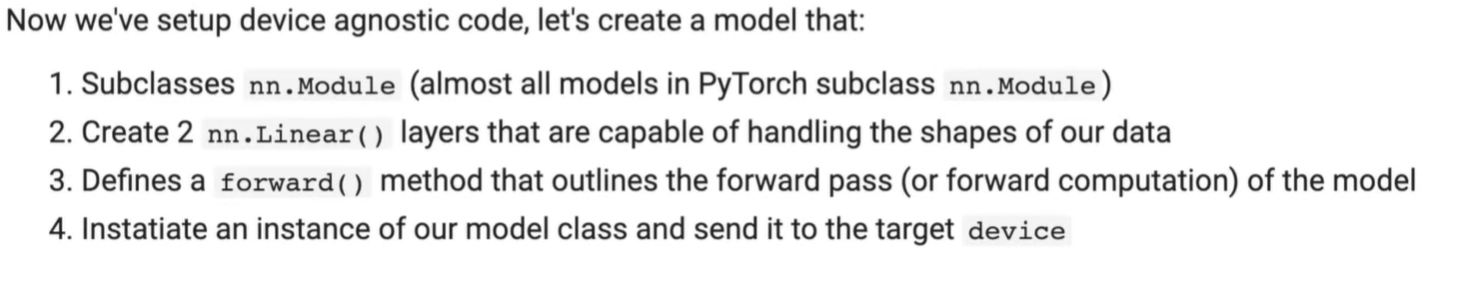

In [ ]:
device , X_train.shape, X_train


('cuda',
 torch.Size([800, 2]),
 tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]))

In [ ]:
#make a subclass of nn.Moduole
import torch
from torch import nn
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #Create linear layers capable of handling our imputs shape of our data
    self.layer1 = nn.Linear(in_features = 2, out_features = 5, )#takes in 2 features and upscales it to 5 features
    self.layer2 = nn.Linear(in_features= 5, out_features = 1) # Takes in 5 features from previous layer and outputs a single feature which is same shape as y
    #define a forward method that outlines the forward pass
      #x->layer_1->layer_2->Output
    def forward(self, x):
      return self.layer2(self.layer1(x))
#instantiante an instanvce o f the model class and send it to the device
model_0 = CircleModelV0().to(device)

#change this to code to see it in action press ctrl+m twice
#make a subclass of nn.Moduole
import torch
from torch import nn
class CircleModelV0(nn.Module):
  def __init__(self):  
    super().__init__()
    self.twoLinear_Layers = nn.Sequential(
nn.Linear(in_features= 2, out_features = 5),
nn.Linear(in_features = 5, out_features=1)).to(device)

    #define a forward method that outlines the forward pass
      #x->layer_1->layer_2->Output
    def forward(self, x):
      return self.twoLinear_Layers((x))
#instantiante an instanvce o f the model class and send it to the device
model_0 = CircleModelV0().to(device)

 ##Lets visualize the neural network for this we could use tensorflow and the link is :
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.26973&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

* Sigmoid function works beast as this is a binaery classification problem
![image.png](
  

  
)

In [ ]:
#lets try to create the same model with sequential
#It is the same thing as the above one, we can create custom forward pass witht the above model, but we can use nn.Sequeential too
model_0 = nn.Sequential(
nn.Linear(in_features= 2, out_features = 5),
nn.Linear(in_features = 5, out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1474,  0.3375],
                      [-0.1072,  0.3548],
                      [-0.3204,  0.2580],
                      [-0.2157, -0.2053],
                      [ 0.3986,  0.4404]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.4141, -0.0354, -0.3992,  0.6997,  0.3759], device='cuda:0')),
             ('1.weight',
              tensor([[-0.4291,  0.4012, -0.3612, -0.2477, -0.1526]], device='cuda:0')),
             ('1.bias', tensor([-0.0209], device='cuda:0'))])

In [ ]:
#make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
  print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape} ")
  print(f"Length of test samples : {len(X_test)}, Shape : {X_test.shape}")
  print(f"First 10 predictions: {untrained_preds[:10]}")
  print(f"First 10 kabels {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1]) 
Length of test samples : 200, Shape : torch.Size([200, 2])
First 10 predictions: tensor([[-0.3765],
        [-0.4068],
        [-0.2655],
        [-0.4081],
        [-0.2152],
        [-0.2341],
        [-0.3591],
        [-0.3185],
        [-0.2678],
        [-0.4083]], device='cuda:0')
First 10 kabels tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])


In [ ]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

##2.1 Setup Loss function and the optimizer
* For regression we could prbably want MAE or MSQ
* We could possibly use cross entropy or categorical cross entropy

* For optimizers two of the most useful are SGD and Adams, we have many useful options if you visit torch.optim page in the pytorch documentation